In [12]:
# if aLL 9 files are filled with picture do not run once again
import pyscreenshot as ImageGrab
import time 

In [ ]:
image_folder="captured_images/9/0.png" #text

for i in range(0,100): 
    time.sleep(3)
    im=ImageGrab.grab(bbox=(40,200,535,800)) 
    print(f"{i} Saved........")
    im.save(image_folder+str(i)+".png")
    print("clear screen and redraw............")
    
print("Copleted! move to the next")

# ONLY RUN ONCE 

In [13]:
#Generate dataset
import cv2
import csv
import glob
 
header  =["label"]
for i in range(0,784):
    
    header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)


for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")
   
    for img_path in dirList:
        im= cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
       
        data=[]
        data.append(label)
        rows, cols = roi.shape
       
       ## Fill the data array with pixels one by one.
        for i in range(rows):
            for j in range(cols):
                k =roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

In [14]:
#run_once()

# LOAD DATA

In [15]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......

data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  \
3529     0      0      0      0      0      0      0      0      0      0   
508      5      0      0      0      0      0      0      0      0      0   
509      5      0      0      0      0      0      0      0      0      0   
1320     3      0      0      0      0      0      0      0      0      0   
701      7      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3722     2      0      0      0      0      0      0      0      0      0   
505      5      0      0      0      0      0      0      0      0      0   
5257     7      0      0      0      0      0      0      0      0      0   
1798     7      0      0      0      0      0      0      0      0      0   
529      5      0      0      0      0      0      0      0      0      0   

      ... pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780  \

C:\Users\user\AppData\Local\Temp/ipykernel_1900/4269496744.py:6: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

In [16]:
X=data.drop(["label"],axis=1)
Y=data['label']
       

0


TypeError: Image data of dtype object cannot be converted to float

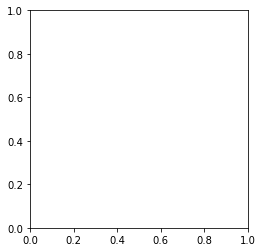

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 50
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [18]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [19]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

ValueError: could not convert string to float: 'pixel0'

In [20]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

ValueError: could not convert string to float: 'pixel0'

In [ ]:
#prediction of image drawn in paint
 
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
model=joblib.load("model/digit_recognizer")
images_folder="img/"
 
while True:
    img=ImageGrab.grab(bbox=(40,200,535,800))
   
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
    #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
    rows,cols=roi.shape
   
    X = []
   
   ##  Fill the data array with pixels one by one.
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
           
    predictions  =model.predict([X])
    print(f"{i} Prediction:",predictions[0])
    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
        break
cv2.destroyAllWindows()

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


27 Prediction: 0
